In [1]:
import re
import sys
import pandas as pd
sys.path.append('/home/oliver/dev/uzh/atai_bot/bot')
from util.question_analyser import QuestionAnalyser
import pickle

In [2]:
mul=[           "Show me a picture of Halle Berry. ",
            "What does Julia Roberts look like? ",
    "Let me know what Sandra Bullock looks like. ", ]

In [3]:
# Sample sentences
sentences = [
    # Image requests
    "Show me a picture of James Bond",
    "Display the poster of Jurassic Park",
    # Text requests
    "Is Public Enemy No. 1 - Todestrieb a crime thriller?",
    "Did Christopher Nolan direct Inception?"
]

# Keywords indicating an image request
image_keywords = [
    "picture of", "display the", "look like", "photo of", "movie poster",
    "cover of", "trailer of", "image of", "cast of", "scene from"
]

def is_image_request(sentence):
    for keyword in image_keywords:
        if re.search(keyword, sentence, re.IGNORECASE):
            return True
    return False

# Classify each sentence
for sentence in sentences:
    if is_image_request(sentence):
        print(f"Image request: {sentence}")
    else:
        print(f"Text response: {sentence}")


Image request: Show me a picture of James Bond
Image request: Display the poster of Jurassic Park
Text response: Is Public Enemy No. 1 - Todestrieb a crime thriller?
Text response: Did Christopher Nolan direct Inception?


In [4]:
analyser=QuestionAnalyser()

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
with open("human_dict.pickle", 'rb') as f:
    human_dict = pickle.load(f)
names = list(human_dict.keys())
with open("/home/oliver/dev/uzh/atai_bot/dataset/pickles/updated_dataset.pickle", 'rb') as f:
    graph = pickle.load(f)



In [4]:
file_path = '/home/oliver/dev/uzh/atai_bot/dataset/movienet/images.json'

df = pd.read_json(file_path)
df['cast'] = df['cast'].astype(str)
df['type'] = df['type'].astype(str)

In [3]:
movies, name = analyser.get_movie_title("How does Richard Marquand look like?")
entity = human_dict[name]
print(human_dict[name])

NameError: name 'analyser' is not defined

In [ ]:
query_template = """PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX ddis: <http://ddis.ch/atai/>
SELECT ?value
WHERE {{
     {0} wdt:P345 ?value .
}}
"""

query = query_template.format("wd:"+entity.split('/')[-1])
print(query)

# Ensure to use the 'query' variable, not 'query_template' for execution
result = graph.query(query)
imdb_id = None
for row in result:
    imdb_id= str(row[0])


In [ ]:
df.head()

In [ ]:
# Assuming filtered_df is already defined as you mentioned
filtered_df = df[df['cast'].str.contains(imdb_id) & df["type"].str.contains("event")]
if len(filtered_df)==0:
    filtered_df = df[df['cast'].str.contains(imdb_id) & df["type"].str.contains("publicity")]
# Sort filtered_df based on the string length of 'cast'
sorted_df = filtered_df.sort_values(by='cast', key=lambda col: col.str.len(), ascending=True)

sorted_df['img'].iloc[0]

In [ ]:
from IPython.display import Image

# Display an image by specifying the file path
Image(filename=f'/home/oliver/dev/uzh/atai_bot/dataset/movienet/images/{sorted_df["img"].iloc[0]}')

In [ ]:
df.to_pickle("movienet_index.pickle")

In [2]:
df = pd.read_pickle("../dataset/pickles/movienet_index.pickle")

In [3]:
df.head(n=100)

,w,movie,img,h,type,cast
0,1666,[tt4882376],0315/rm601699072.jpg,1000,behind_the_scenes,"['nm8801745', 'nm0001401']"
1,999,[tt2318625],2538/rm814292736.jpg,562,still_frame,['nm2072214']
2,1500,[tt4003966],0354/rm2068192512.jpg,1000,still_frame,['nm0268626']
3,1333,[],3777/rm27402752.jpg,1000,publicity,['nm6655379']
4,704,[],3459/rm537652736.jpg,1000,event,"['nm1577190', 'nm7097953']"
...,...,...,...,...,...,...
95,605,[tt1889673],0287/rm3847476224.jpg,720,publicity,['nm2448095']
96,360,"[tt0496424, tt1248331]",1842/rm486771200.jpg,240,still_frame,"['nm0275486', 'nm0358316']"
97,268,[tt2012665],2023/rm3718163456.jpg,448,publicity,"['nm4578163', 'nm0662519']"
98,450,[],3667/rm2266275072.jpg,636,publicity,['nm1534812']


In [63]:
# Assuming filtered_df is already defined as you mentioned
imdb_id = "['tt0120338']"
# Redefine the imdb_id without brackets
imdb_id = 'tt0120338'

# Filter the DataFrame
filtered_df = df[df['movie'].apply(lambda x: imdb_id in str(x)) & df["type"].str.contains("poster")]

sorted_df.iloc[0]

w                         674
movie           ['tt1653690']
img      1723/rm393840128.jpg
h                        1000
type                   poster
cast            ['nm1388074']
Name: 21, dtype: object

In [69]:

# Assuming df is your DataFrame
# Check if the movie column contains 'tt0120338'
import pandas as pd

# Assuming df is your DataFrame
# Check if the movie column contains 'tt0120338' and type column is 'poster'
filtered_df = df[(df['movie'].apply(lambda x: 'tt0120338' in x)) & (df['type'] == 'poster')]

# Display the filtered DataFrame
filtered_df

,w,movie,img,h,type,cast
206796,671,['tt0120338'],0596/rm2647458304.jpg,1000,poster,"['nm0000701', 'nm0000138']"
804544,693,['tt0120338'],1565/rm324329472.jpg,1000,poster,"['nm0000701', 'nm0000138']"
976602,580,['tt0120338'],3698/rm4043967488.jpg,860,poster,"['nm0000701', 'nm0000138']"
995842,706,['tt0120338'],1497/rm1423630336.jpg,1000,poster,"['nm0000701', 'nm0000138']"
1414286,448,['tt0120338'],3657/rm1724521984.jpg,672,poster,"['nm0000701', 'nm0000138']"
1704538,675,['tt0120338'],0019/rm901821184.jpg,1000,poster,"['nm0000701', 'nm0000138']"
2092156,580,['tt0120338'],3787/rm2056662272.jpg,905,poster,"['nm0000701', 'nm0000138']"
2179935,300,['tt0120338'],1623/rm147463680.jpg,407,poster,"['nm0000701', 'nm0000138']"
2616158,680,['tt0120338'],2441/rm2681012736.jpg,1000,poster,"['nm0000701', 'nm0000138']"


In [70]:
print(filtered_df.iloc[0])

w                               671
movie                 ['tt0120338']
img           0596/rm2647458304.jpg
h                              1000
type                         poster
cast     ['nm0000701', 'nm0000138']
Name: 206796, dtype: object


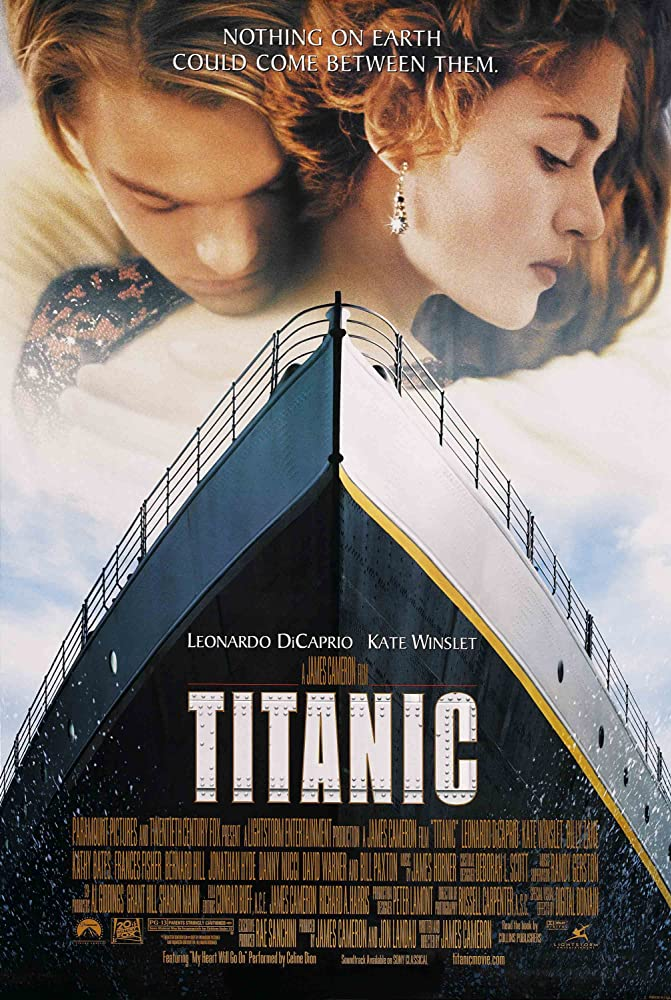

In [71]:
from IPython.display import Image

# Display an image by specifying the file path
Image(filename=f'/home/oliver/dev/uzh/atai_bot/dataset/movienet/images/{filtered_df["img"].iloc[0]}')

In [20]:
is_present = 'nm0000158' in df['cast'].values

In [19]:
is_present

False

In [25]:
print(df[df['movie'].str.contains("tt0499549")])

KeyError: "None of [Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n       ...\n       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n      dtype='float64', length=3155532)] are in the [columns]"

In [30]:
df['movie'] = df['movie'].astype(str)

In [34]:
indices = df.index[df['movie'] == "['tt0499549']"].tolist()

In [35]:
indices

[3419,
 26244,
 27376,
 41902,
 55229,
 65885,
 88566,
 104727,
 126407,
 165103,
 197553,
 234702,
 288152,
 308211,
 313768,
 315681,
 326248,
 359222,
 359384,
 394511,
 412520,
 423520,
 425821,
 458677,
 465734,
 467520,
 470592,
 479272,
 493052,
 501342,
 524266,
 525162,
 536827,
 559918,
 568366,
 580777,
 582211,
 590184,
 601958,
 614752,
 620750,
 626824,
 635140,
 650579,
 655525,
 672059,
 676829,
 688643,
 690586,
 693872,
 712842,
 717748,
 732953,
 733595,
 734235,
 741497,
 744337,
 745040,
 747509,
 755211,
 771903,
 773576,
 780426,
 780973,
 788244,
 793727,
 812124,
 828512,
 837742,
 864726,
 898009,
 929597,
 933704,
 950946,
 1057958,
 1066505,
 1068085,
 1073094,
 1109979,
 1119611,
 1134181,
 1184691,
 1192542,
 1209771,
 1221969,
 1223170,
 1236995,
 1270716,
 1276081,
 1277239,
 1279635,
 1281387,
 1298152,
 1313956,
 1375359,
 1402319,
 1468058,
 1471485,
 1498991,
 1502711,
 1507534,
 1520553,
 1521060,
 1535966,
 1543583,
 1557300,
 1572398,
 1577152,
 1

In [33]:
df['movie'].iloc[0]

"['tt4882376']"